<a href="https://colab.research.google.com/github/atulchune/Mobile-price-range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -Mobile Price Range Prediction**
**Project Type - Classification**

**Contribution - Individual**

# **Project Summary -**

* Developed a machine learning model to predict the price range of mobile
phones.
* Collected and preprocessed extensive data on mobile phone specifications, features, and pricing.
* Utilized Python and popular data analysis libraries like Pandas and Scikit-Learn for data manipulation and modeling.
* Employed a variety of machine learning algorithms, including decision trees, random forests, and gradient boosting, to build predictive models.
* Conducted thorough model evaluation using metrics such as accuracy, precision, recall, and F1-score.
* Optimized model performance through techniques like cross-validation and hyperparameter tuning.
* Collaborated with industry experts to incorporate domain-specific knowledge and enhance model interpretability.
* Delivered a reliable mobile price range prediction system, empowering stakeholders in the mobile industry to make informed decisions regarding product pricing and marketing strategies."

# **Project Objective**


The objective of this project is to develop a robust machine learning model that accurately predicts the price range of mobile phones based on various features and specifications. The problem statement can be defined as follows:



# **Problem Statement**


In the highly competitive mobile phone market, manufacturers and retailers need an efficient way to determine the appropriate price range for their products to maximize sales and profitability. Pricing a mobile phone too high can lead to reduced demand, while pricing it too low can result in lost revenue. Therefore, there is a critical need for a predictive model that can help businesses estimate the optimal price range for a mobile phone based on its characteristics.

# **GitHub Link -**

https://github.com/atulchune/Mobile-price-range-Prediction.git

# **Data Description -**

*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

## **Import the libraries and the dataset to understand the variables present:**

In [322]:
# importing  all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [323]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction/data_mobile_price_range.csv')
#Return the first 5 rows of the DataFrame
df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [325]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [326]:
len(df.columns)

21

There are 21 columns

In [327]:
# The tail () function is used to get the last n rows.
df.tail

<bound method NDFrame.tail of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width

In [328]:
# shape of the dataset
df.shape

(2000, 21)

* There are 21 columns in the dataset including the target variable.

* There are a total of 2000 records of mobile phone data in our dataset.

In [329]:
# check datatypes of the features
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Data Analysis

In [330]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [331]:
#Description of the data
df.describe()
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


From the above description, I can see the minnimum value for columns 'sc_w' (screen width) and for 'px_height' is 0, which is not possible in real life. We need handle these discrepencies in data and will have to replace these values.

In [332]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [333]:
#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [334]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

there are no duplicate values

In [335]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [336]:
#checking whether there is null values or not
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no missing values in the data set

In [337]:
# Write your code to make your dataset analysis ready.
# we are replacing the columns names with understandable names

df=df.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
df


,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,...,Pixel R. Height,Pixel R. Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


Feature names are not understandable so I rename them and make them easily understandable

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1**

In [338]:
# Chart - 1 visualization code
# lets have a look at our target variable

price_range_values = df['Price Range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: Price Range, dtype: int64

<Axes: ylabel='Price Range'>

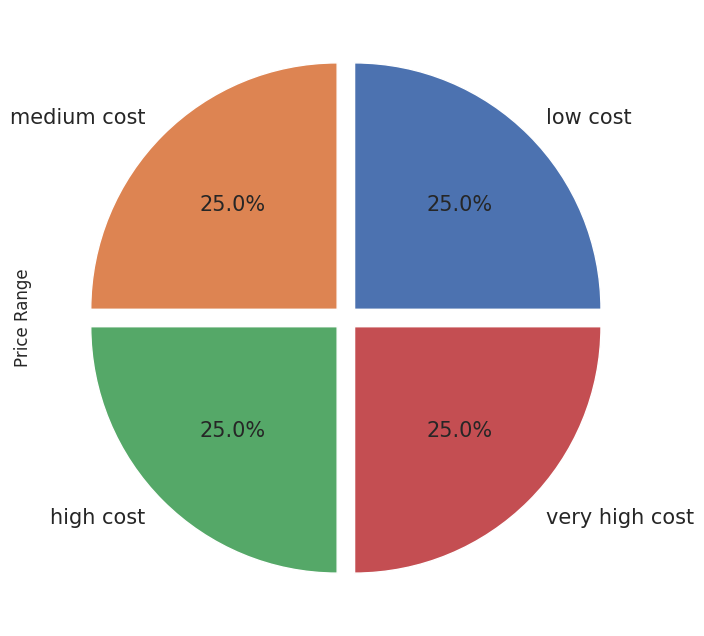

In [339]:

# Visualizing the Target variable's class distribution.

labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)

**1. Why did you pick the specific chart?**

To find mobile price range distibution.

**2. What is/are the insight(s) found from the chart?**

We can see that our target varibale is equally distributed.

**Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us**

**Chart - 2**

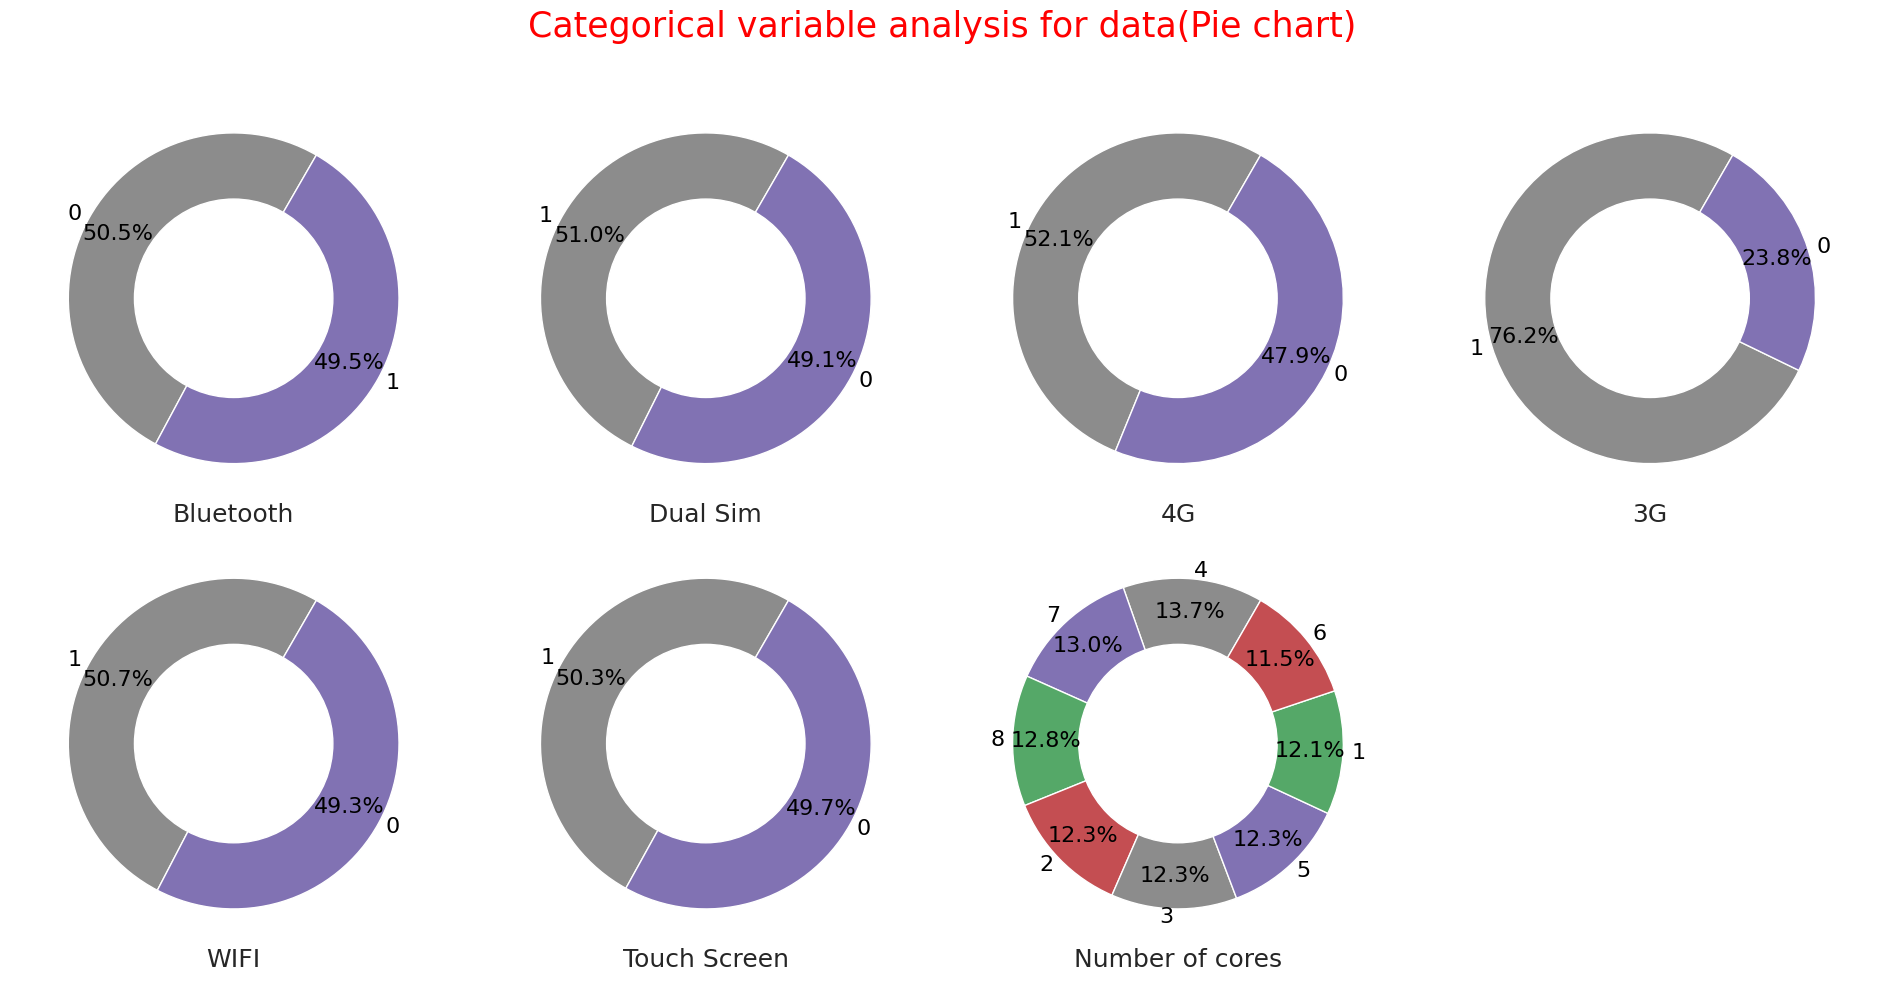

In [340]:
Cols = ['Bluetooth','Dual Sim','4G','3G','WIFI','Touch Screen','Number of cores']
''
plt.figure(figsize = [19,10])
plt.suptitle('Categorical variable analysis for data(Pie chart)\n', fontsize=25, c = 'red')
colors = ['C7','C4', 'C2', 'C3']
# T0 creat sets of Categorical Variables to analyize them
Cols = ['Bluetooth','Dual Sim','4G','3G','WIFI','Touch Screen','Number of cores']
i = 1
for col in Cols:
        plt.subplot(2,4,i)
        my_circle = plt.Circle((0, 0), 0.6, color='white')
        sizes = df[col].value_counts()
        d = plt.pie(sizes, colors = colors, labels = df[col].value_counts().index, autopct='%1.1f%%',
            startangle=60, pctdistance=0.8, labeldistance=1.05, textprops={'color':'black', 'fontsize' : 16})
        plt.axis('equal')
        plt.gca().add_artist(my_circle)

        plt.xlabel(col, size=18)

        i+=1

plt.tight_layout()
plt.show()

**1. Why did you pick the specific chart?**

To find distribution of some specifications that mobiles have.

**2. What is/are the insight(s) found from the chart?**

Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.
Very few mobiles(23.09%) dont have 3G connection.



**Chart - 3**

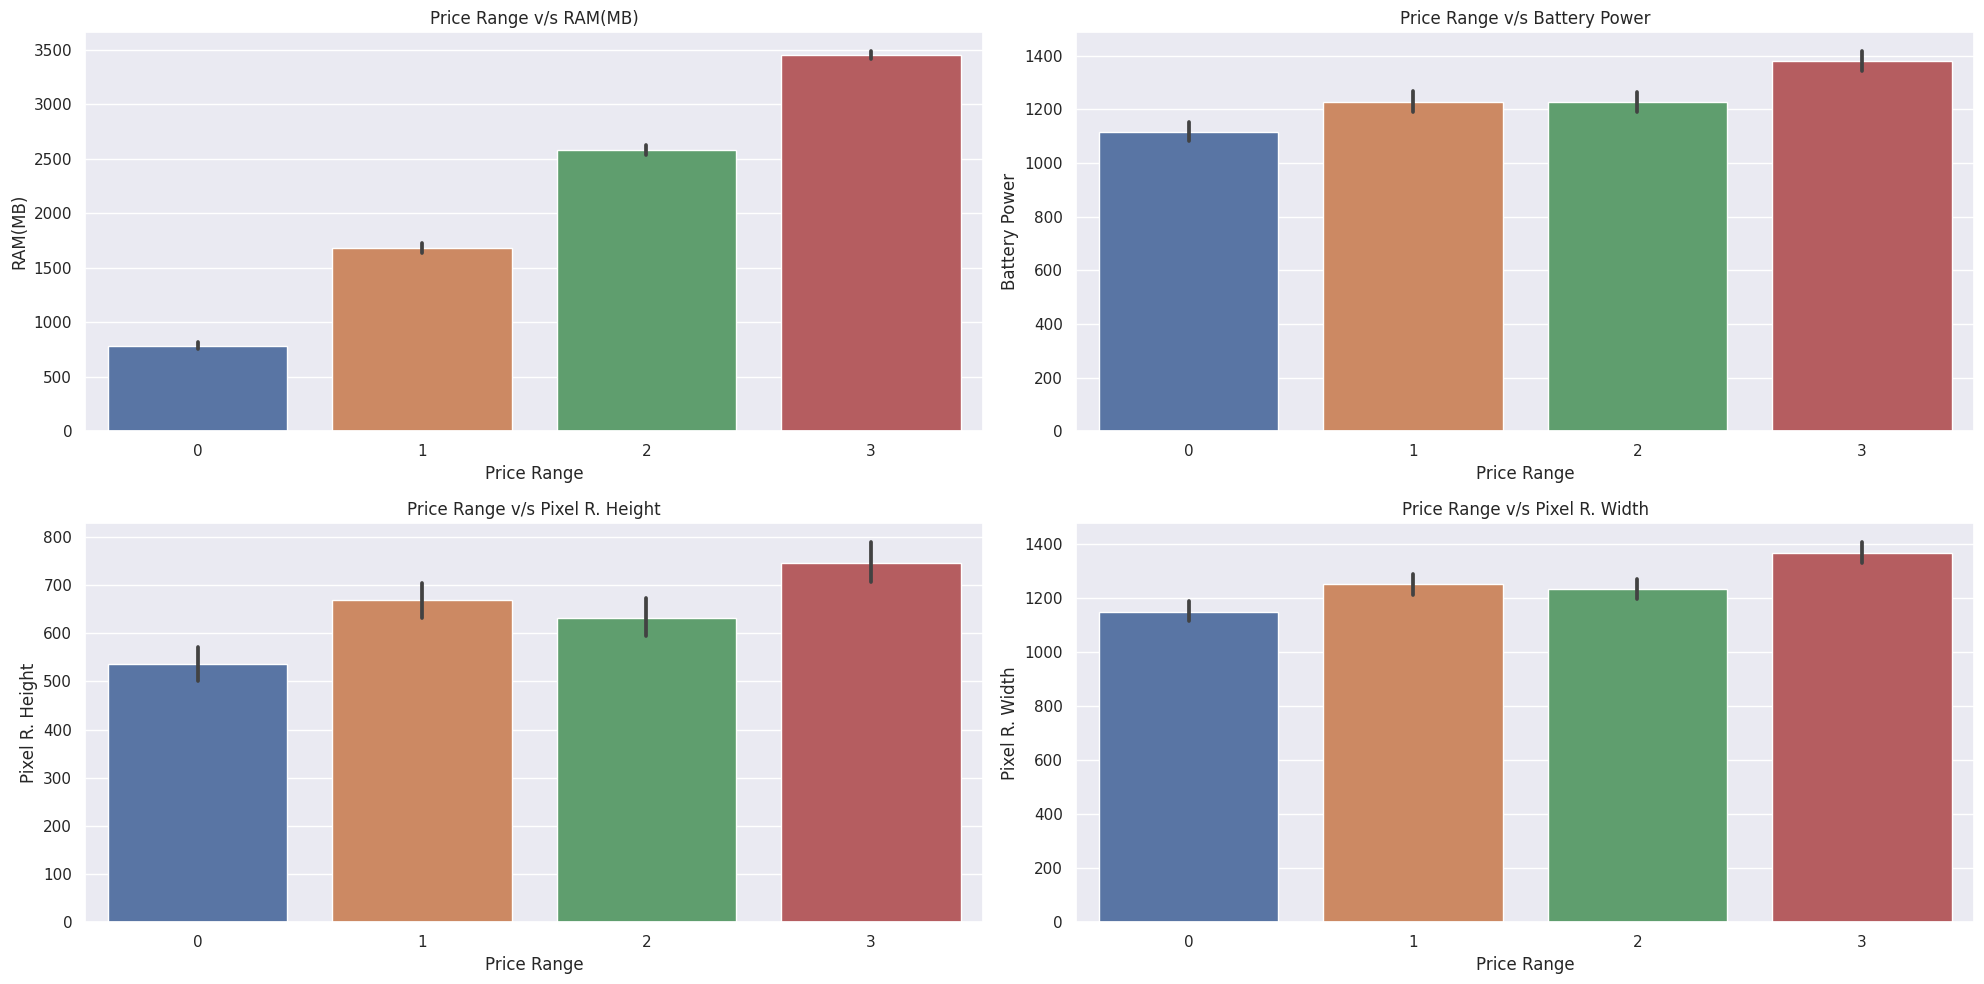

In [341]:
# Chart - 3 visualization code

# plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2
cols=2
counter=1

variables=['RAM(MB)','Battery Power','Pixel R. Height','Pixel R. Width']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x = df['Price Range'], y = df[var])
  plt.title(f'Price Range v/s {var}')
  counter=counter+1
  plt.tight_layout()

**1. Why did you pick the specific chart?**

To find relation between some features and target variable

**2. What is/are the insight(s) found from the chart?**

* Mobiles having RAM more than 3000MB falls under Very high cost category.As RAM increases price range also increases.

* Mobiles having RAM less than 1000 MB falls under low cost category.

* Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.

* Mobiles with more than 700 pixel height and width more than 1300 has very high cost.

**Chart - 4**

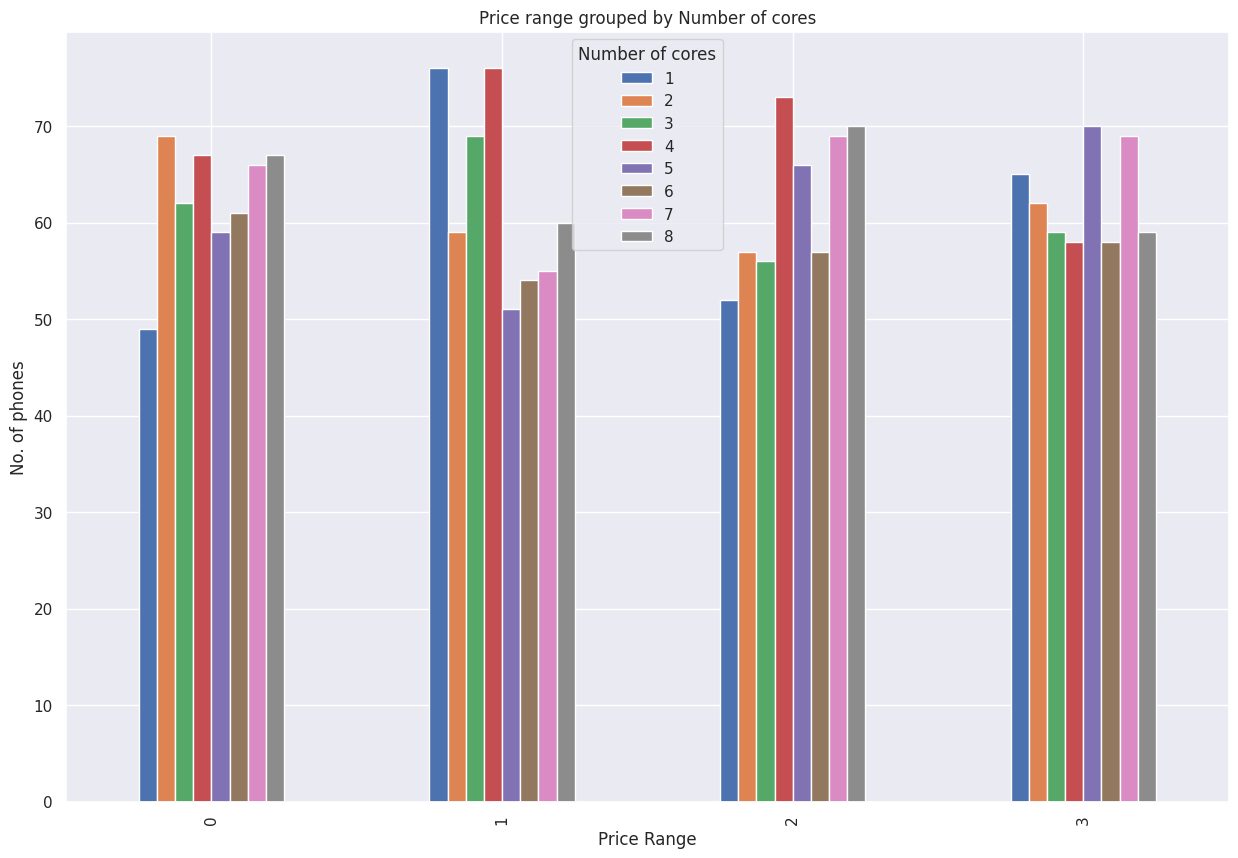

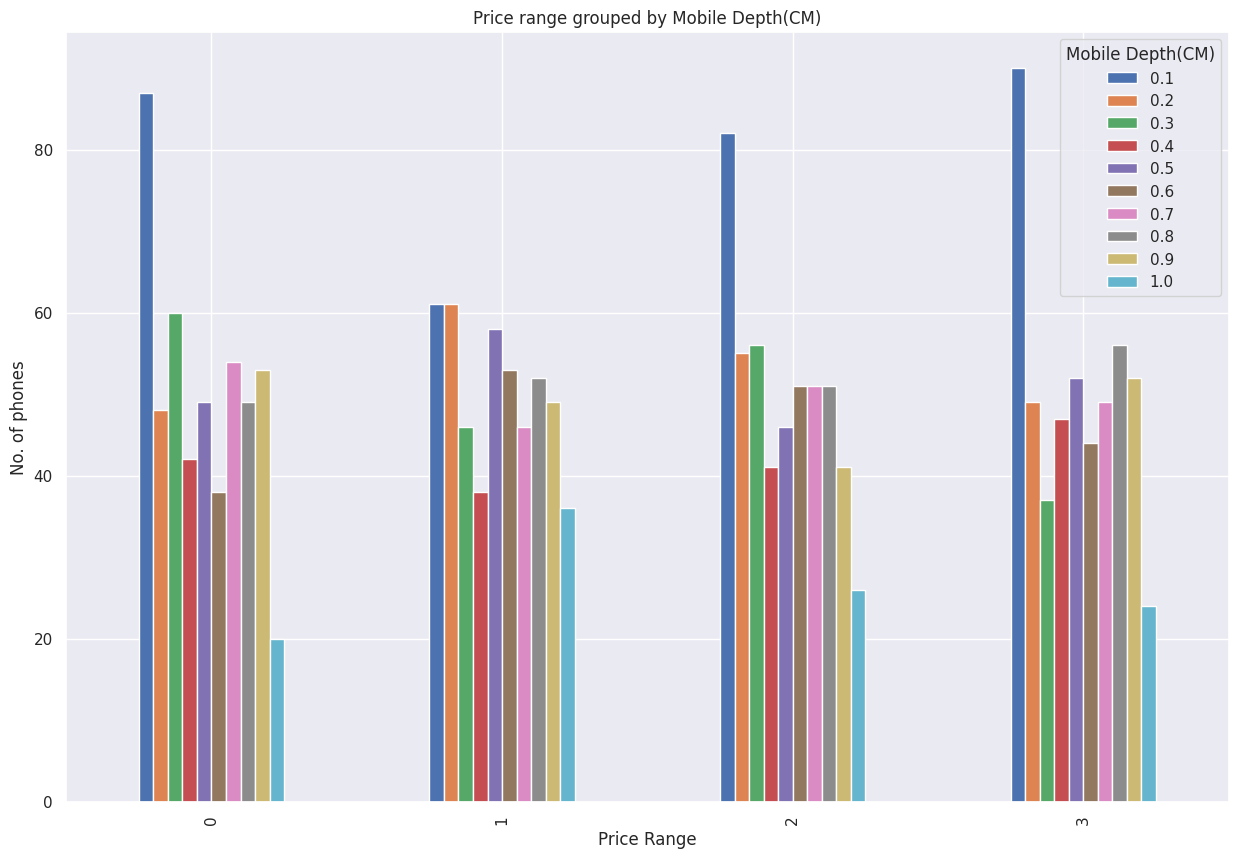

In [342]:
# Chart - 4 visualization code

list_2=['Number of cores','Mobile Depth(CM)']
for item in list_2:

  df.groupby(['Price Range'])[item].value_counts().unstack().plot.bar(figsize=(15,10))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

**1. What is/are the insight(s) found from the chart?**

* There are very few mobiles in price range 0 and 1 with lesser no of cores.

* Most of the mobiles in price range 2 and 3 are with high no of cores.

* Number of phones with less thickness is high and count of phones with high thickness is low.

**Chart-5**

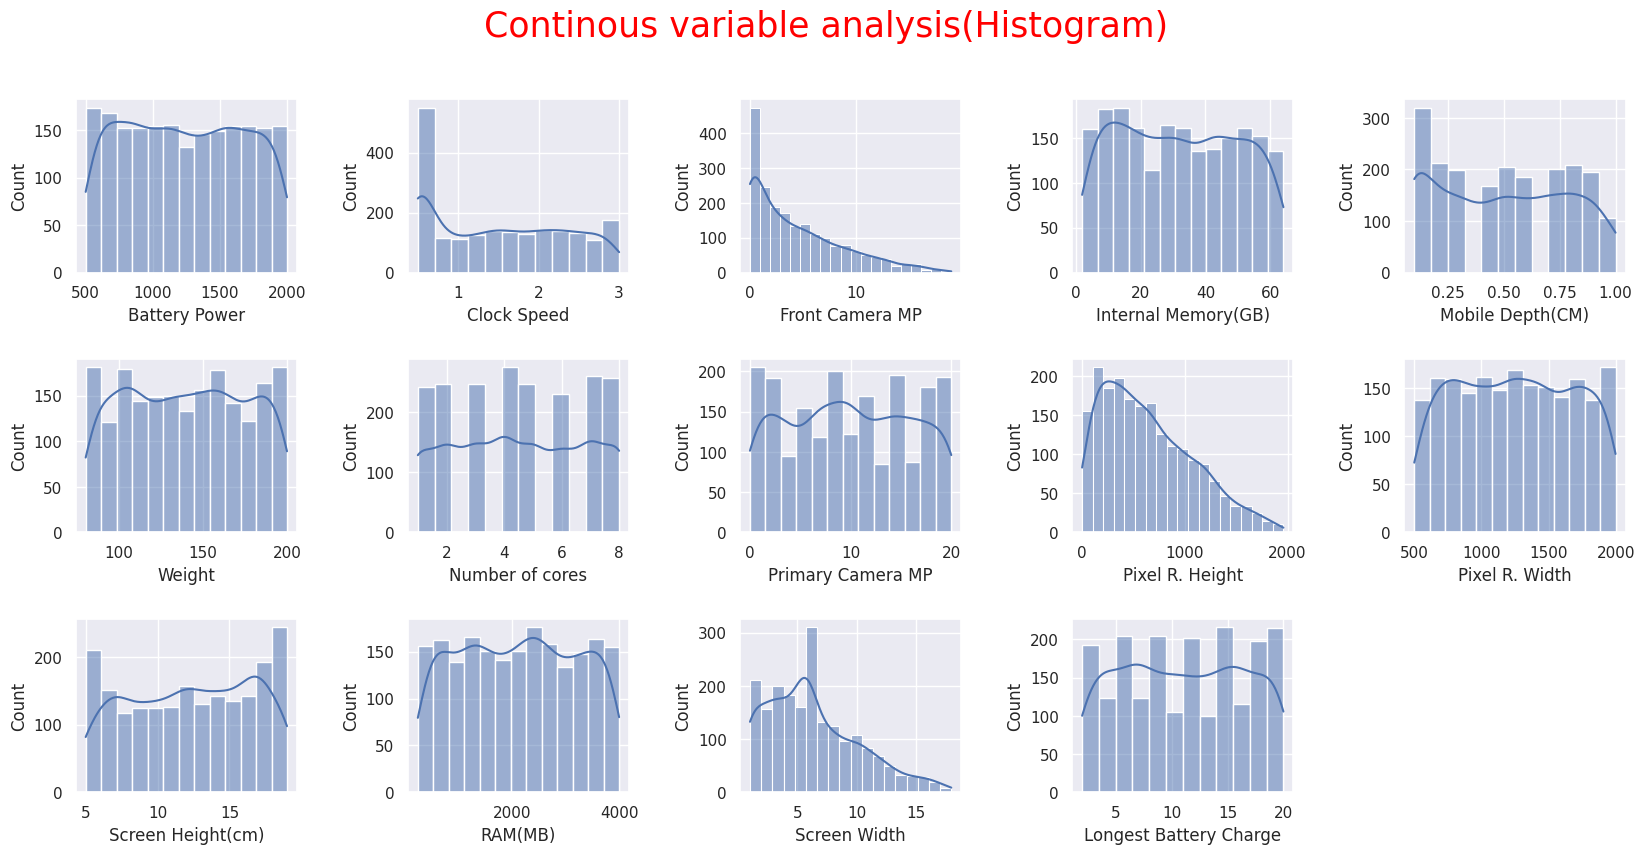

In [343]:
# Chart - 5 visualization code
plt.figure(1 , figsize = (20 , 9))
plt.suptitle('Continous variable analysis(Histogram)\n', fontsize=25, c = 'red')
i = 0
for col in list_1:
    i += 1
    plt.subplot(3 , 5 , i)
    #plt.hist(df[col])
    sns.histplot(df[col], kde = True)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)

plt.show()


**1. What is/are the insight(s) found from the chart?**

* Most number of low cost mobiles, has battery power 750(mAh).

* Most number of very high cost mobiles, has battery power 1500-2000(mAh).

* Most of mobiles in all price range, has 0.5 clock speed.

* Most of mobiles in all price range, has front camera with 2 mega pixel.

* Most number of very high cost mobiles, has 250 pix_height.

* Most number of very high cost mobiles, has 1900 pix_width

* Most of mobiles in all price range, has 4 cm width.

**Chart-6 Battery Power**

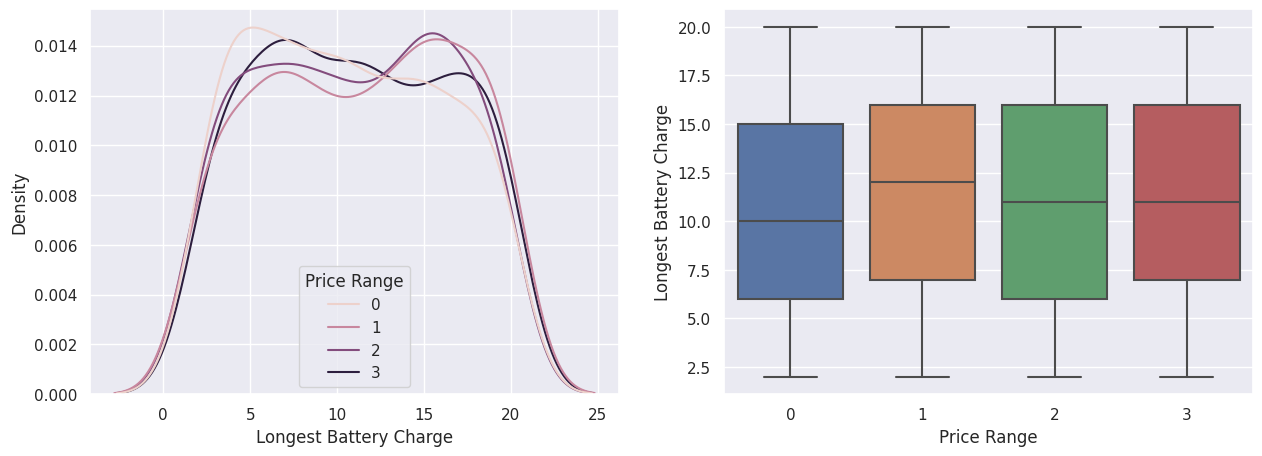

In [344]:
# Chart - 9 visualization code
# Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread


fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Longest Battery Charge', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Longest Battery Charge', ax=axs[1])
plt.show()


**1. Why did you pick the specific chart?**

* Checked can Battery Power be affected in mobile Price?


**2. What is/are the insight(s) found from the chart?**

* Here we can notice clear distribution difference for price_range-0 and price_range-3.

Mobiles in price_range-0 mostly have lower battery power.

Mobiles in price_range-3 mostly have higher battery power.

Mobiles in price_range-1 and price_range-2 also showing some variation in distribtion.

Based on these observations, we can conclude that this feature would be important for predicting price_range.




**Chart-7 Clock Speed**

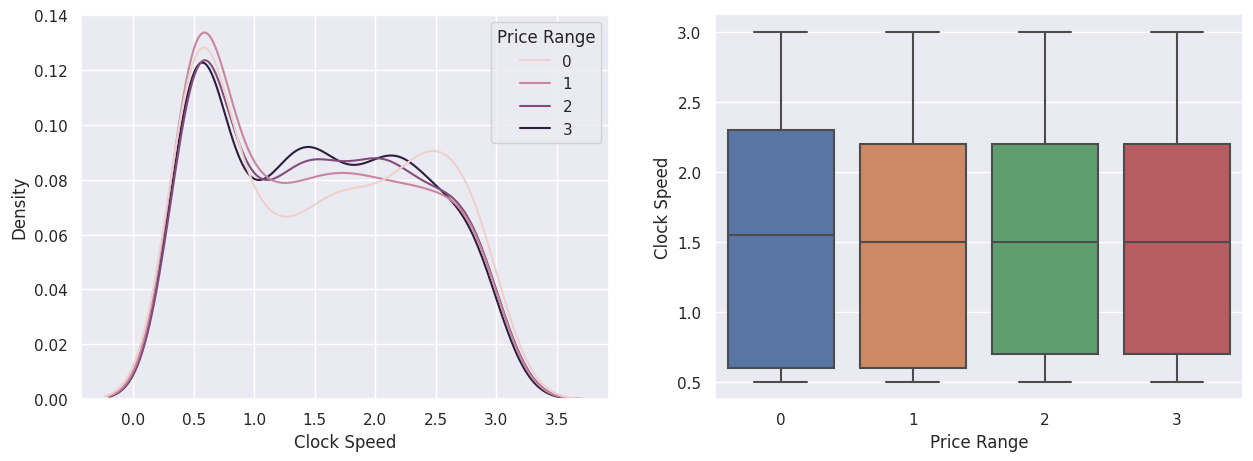

In [345]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Clock Speed', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Clock Speed', ax=axs[1])
plt.show()



*   **The Clock Speed distribution is very similar along all the price ranges except 0 , which is a little different**




**Chart-8 RAM**

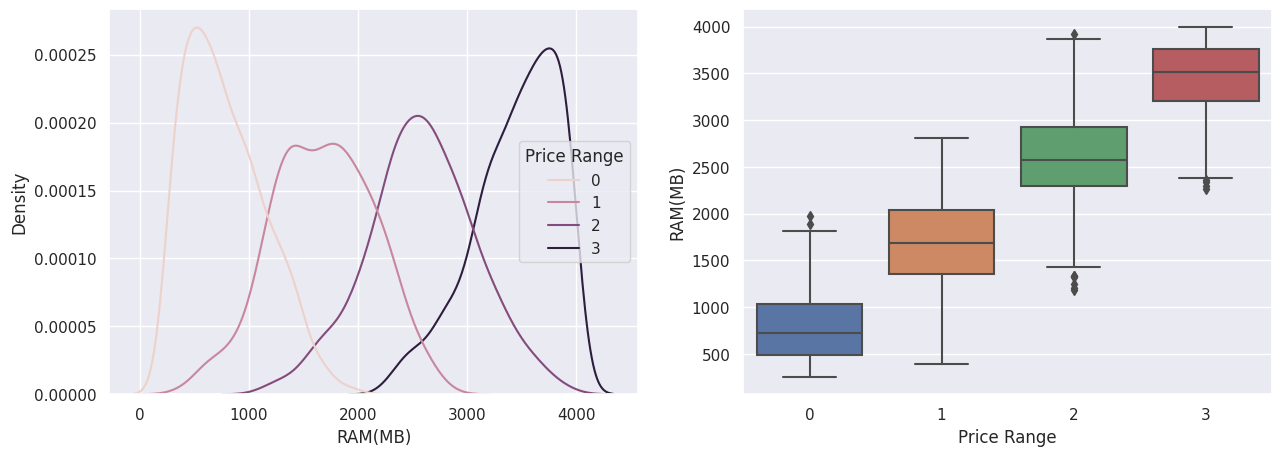

In [346]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='RAM(MB)', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='RAM(MB)', ax=axs[1])
plt.show()


* **RAM is showing a great variation in the distribution along the target variable. Which is a good sign for making predictions. RAM is gonna be a driving factor for predicting price_range.**

**Chart-9 Pixel Width, Pixel Height**

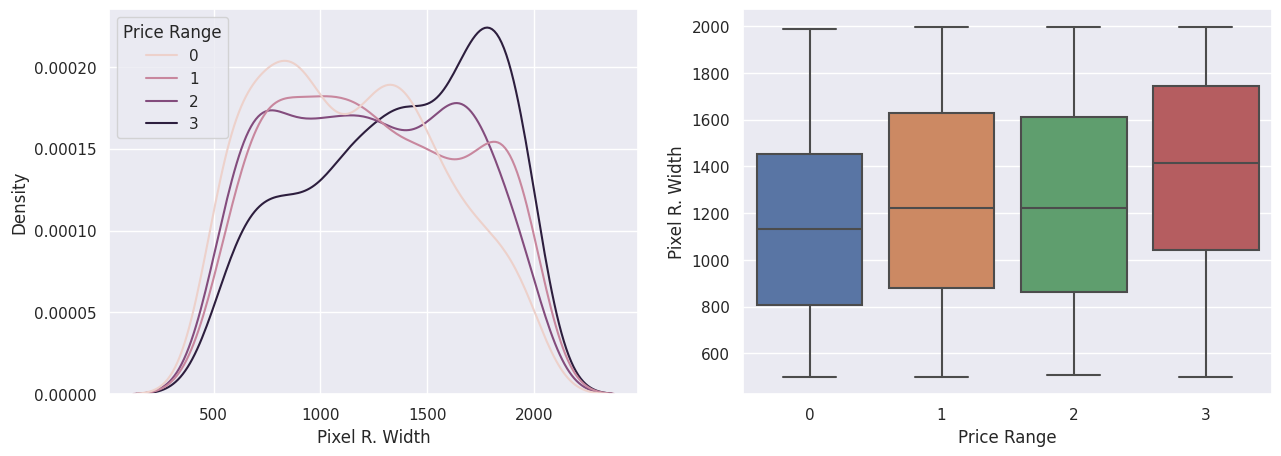

In [347]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Pixel R. Width', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Pixel R. Width', ax=axs[1])
plt.show()

* **There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.**

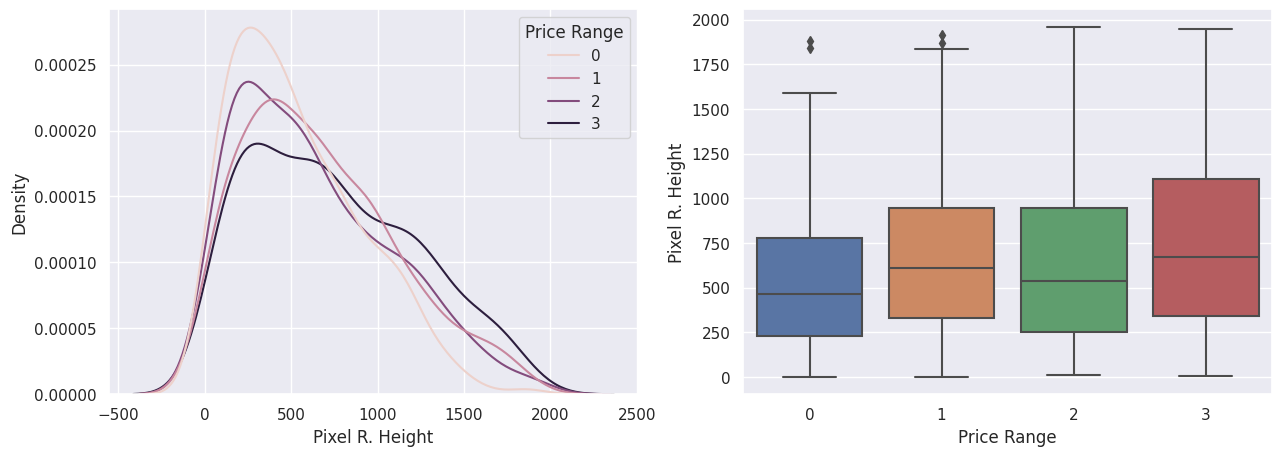

In [348]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Pixel R. Height', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Pixel R. Height', ax=axs[1])
plt.show()

* **Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height**

**Chart-10 FC (front camera megapixels)**

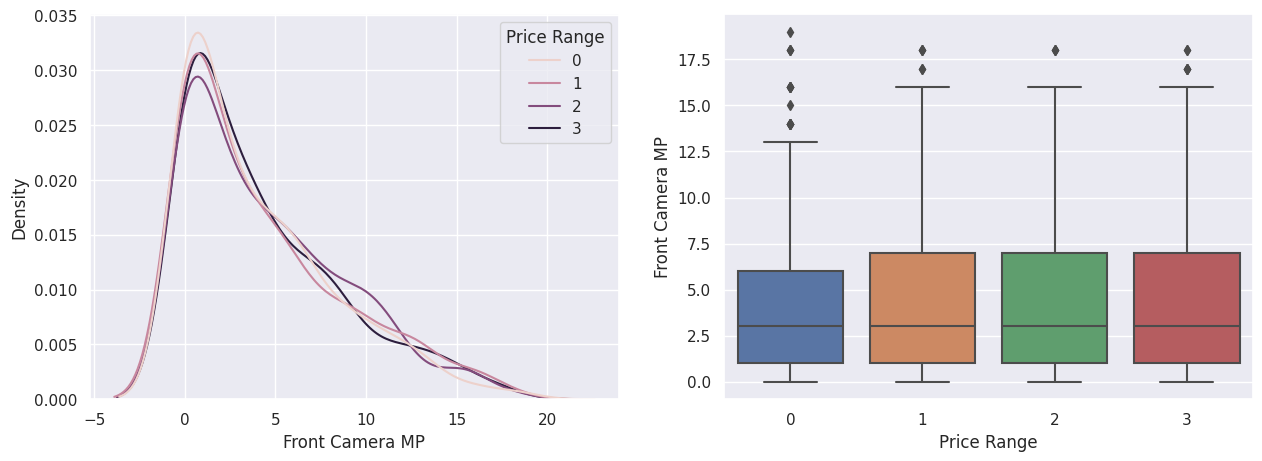

In [349]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Front Camera MP', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Front Camera MP', ax=axs[1])
plt.show()


* **This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.**

**Some outliers can also be seen here, we'll deal with them in a different section.**

**Chart-11 Internal Memory**

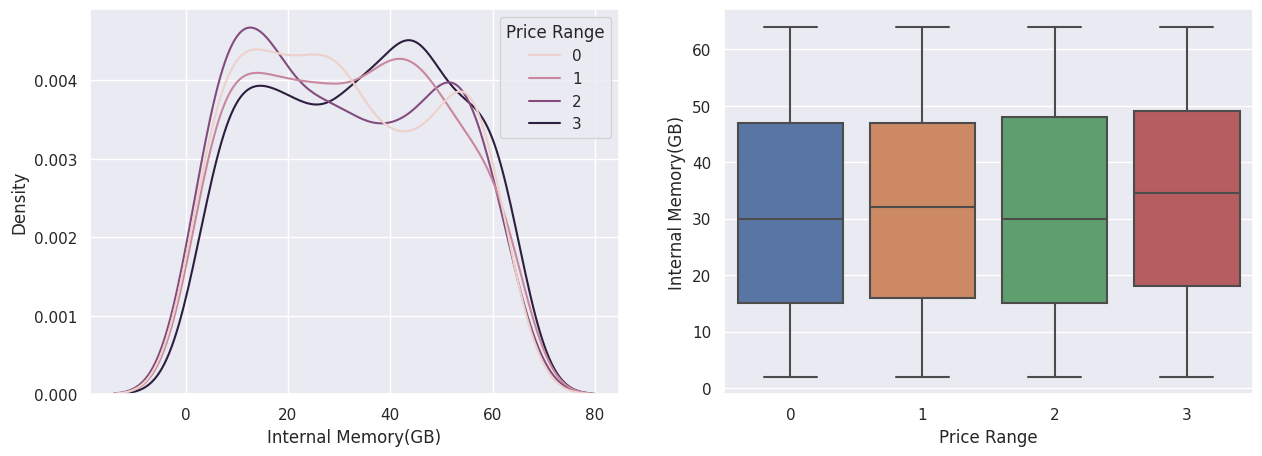

In [350]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Internal Memory(GB)', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Internal Memory(GB)', ax=axs[1])
plt.show()

* **There is a little variation in the Internal Memory along the Price range. Mobiles with higher price seems to have higher internal memory. This feature could be helpful in predicting the Price range**

**Chart-12 Mobile Depth**

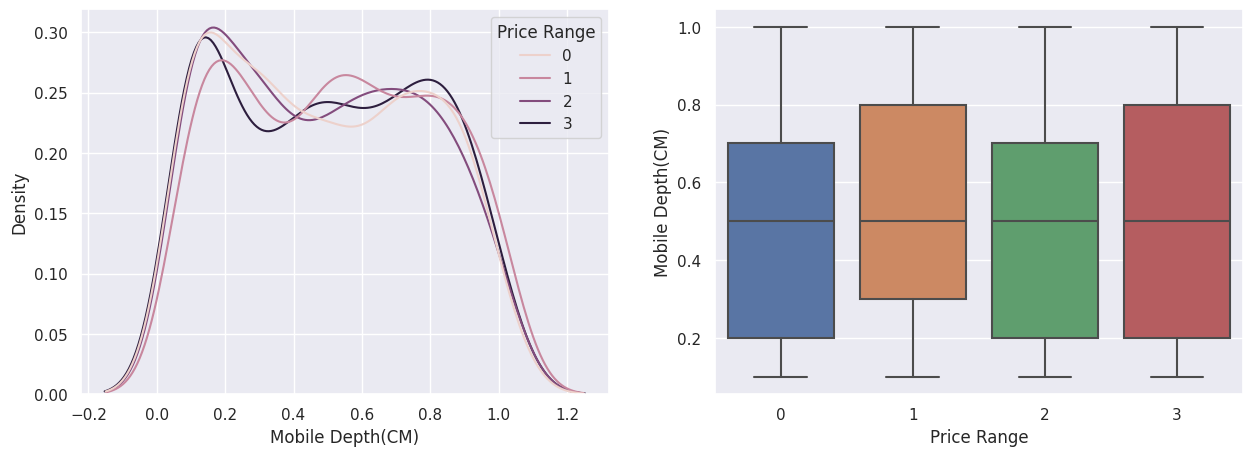

In [351]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Mobile Depth(CM)', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Mobile Depth(CM)', ax=axs[1])
plt.show()

* **Mobile depth again has somewhat similar kind of distribution along all the price_ranges. Just a little variation can be seen in the boxplot. It's not gonna be a very important factor for deciding price.**

**Chart - 13 Mobile Weight**

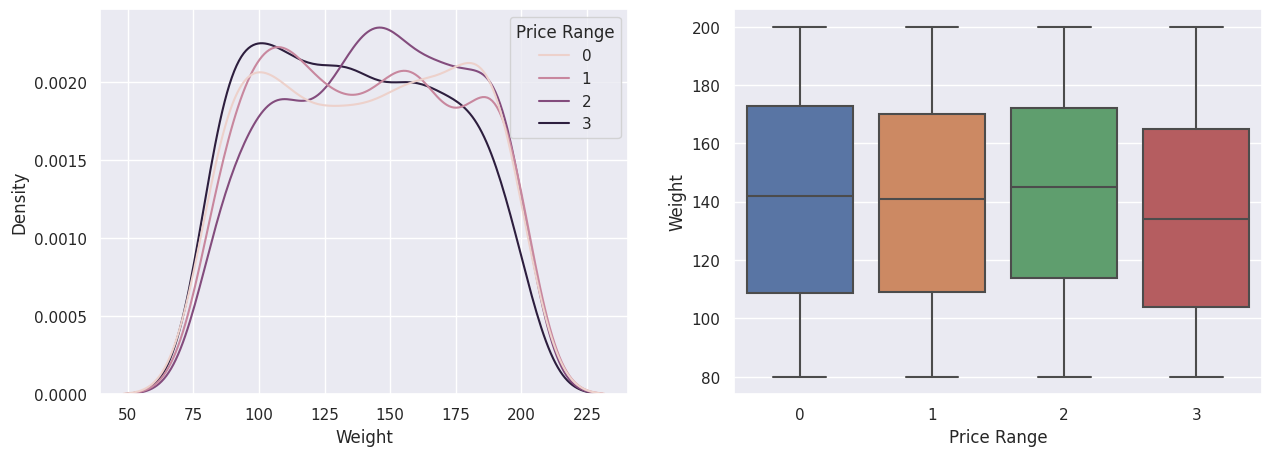

In [352]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Weight', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Weight', ax=axs[1])
plt.show()

* **Mobile weight is reduced a little bit in the Price category-3 which means costly phones are ligher. A little variation is observed here in all price_ranges.**

**Chart-13 PC (Primary camera Megapixels)**

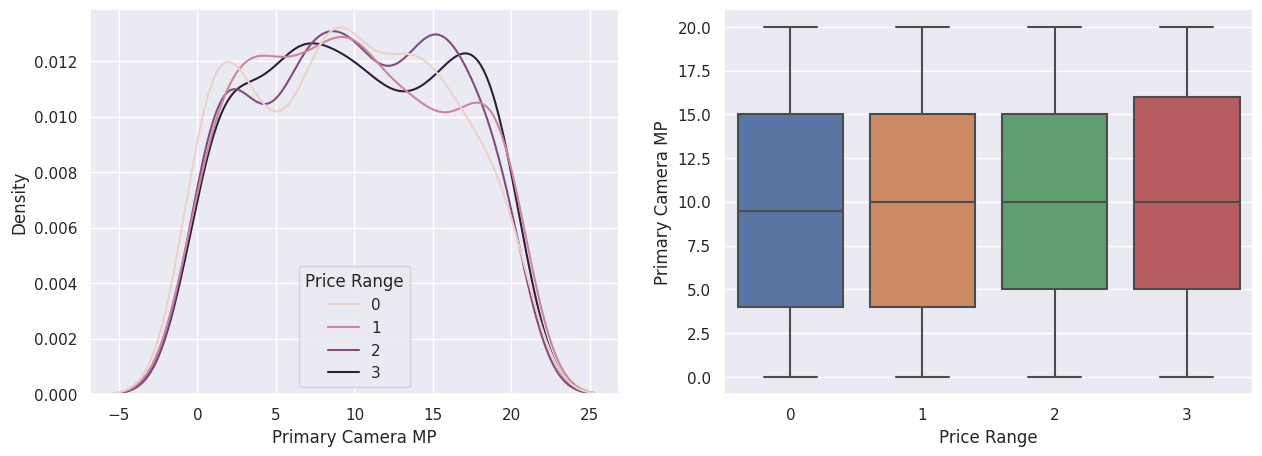

In [353]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Primary Camera MP', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Primary Camera MP', ax=axs[1])
plt.show()

* **Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.**

**Chart-14 n_cores**

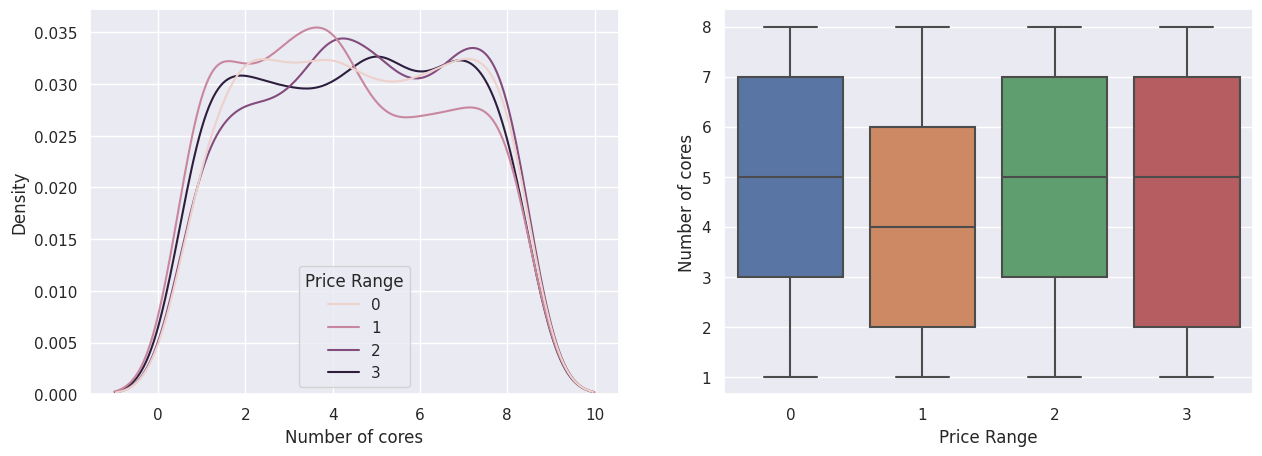

In [354]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Number of cores', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Number of cores', ax=axs[1])
plt.show()

* **Here also n_cores is showing interesting patterns. It may be useful in predictions**

**Chart-15 Screen Size**

In [355]:
#This is a feature that was not given in the dataset and was generated manually with the help of two features screen_height and screen_width.
# Defining new variable sc_size

df['Screen Size'] = np.sqrt((df['Screen Height(cm)']**2) + (df['Screen Width']**2))
df['Screen Size'] = round(df['Screen Size']/2.54, 2)

In [356]:
# Let's drop sc_h and s_w

df.drop(['Screen Height(cm)', 'Screen Width'], axis = 1, inplace = True)

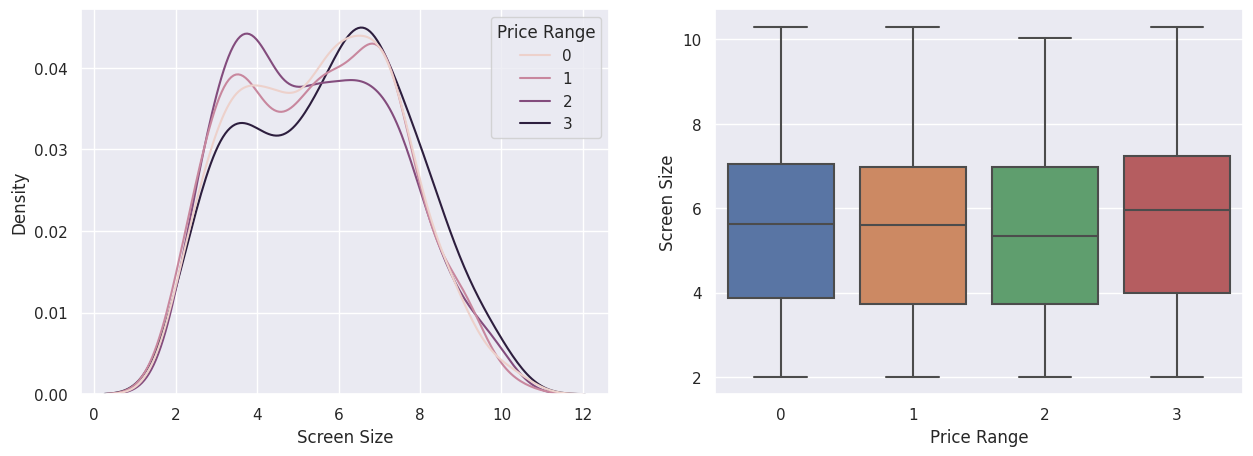

In [357]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='Screen Size', hue='Price Range', ax=axs[0])
sns.boxplot(data=df, x='Price Range', y='Screen Size', ax=axs[1])
plt.show()

* **Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.**

## **Checking colinearity in continuous variables**

<Axes: >

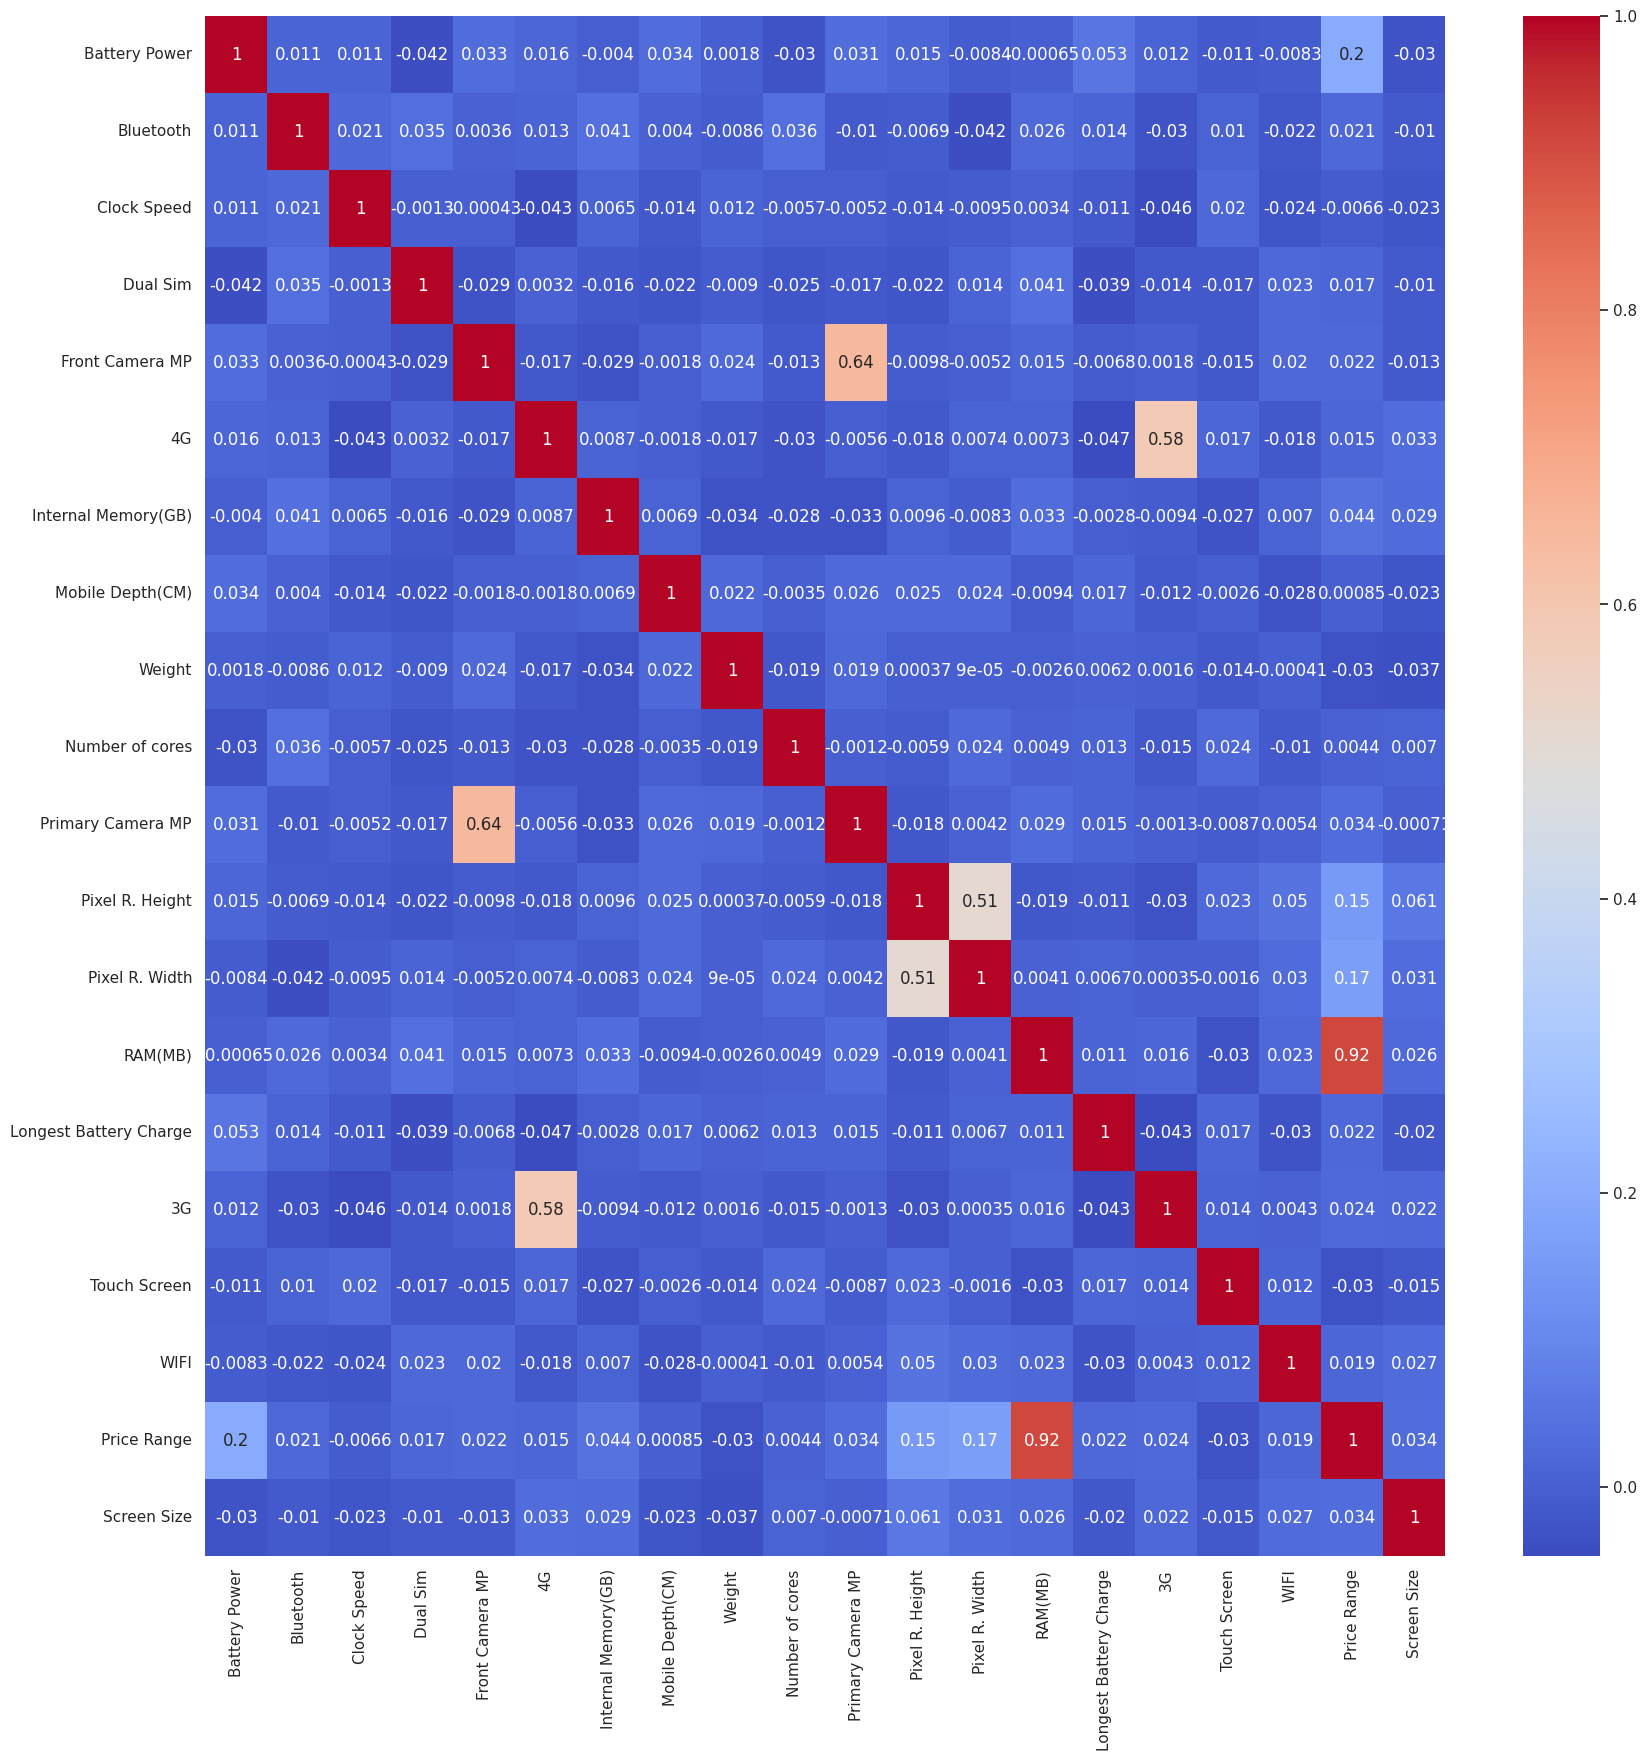

In [358]:
# Checking for multi-collinearity

correlation = df.corr()
plt.figure(figsize = [20, 20])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

* **RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.**

* **There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.**

* **Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.**

In [359]:

#  defining new variable for pixels

df['pixels'] = df['Pixel R. Height']*df['Pixel R. Width']
# Dropping px_height and px_width

df.drop(['Pixel R. Height', 'Pixel R. Width'], axis = 1, inplace = True)
# Checking for multi-collinearity


<Axes: >

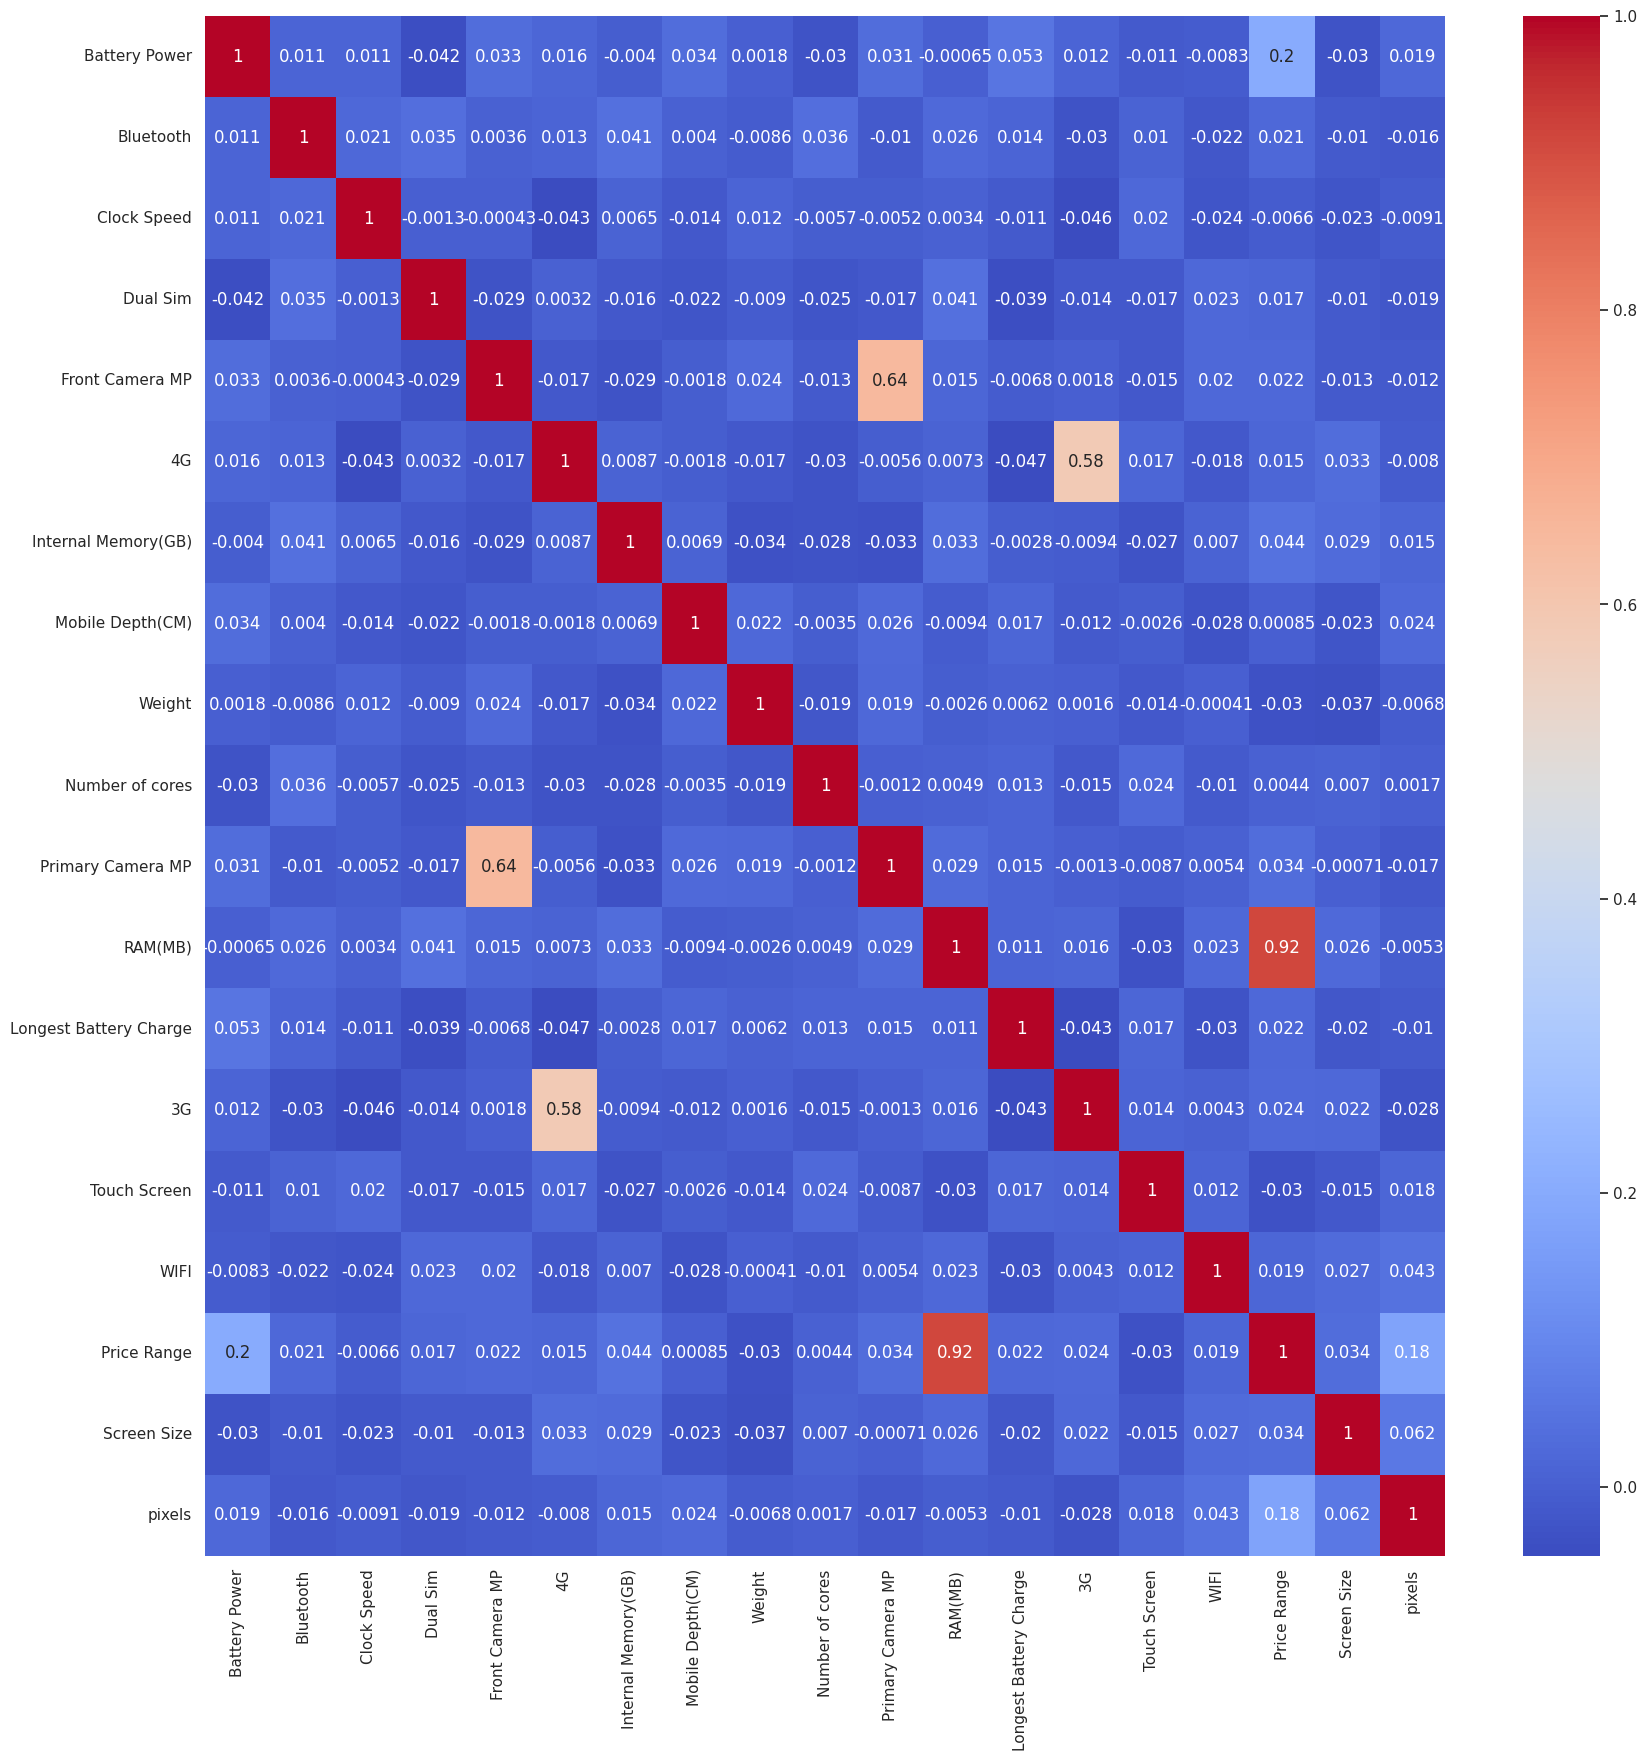

In [360]:
correlation = df.corr()
plt.figure(figsize = [20, 20])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

In [361]:
# categorical and continuous separation

categoricals = [ 'Bluetooth',  'Dual Sim',  '4G',
         '3G', 'Touch Screen', 'WIFI', 'Number of core']
continuous = ['Battery Power','Clock Speed','Front Camera MP','Internal Memory(GB)','Mobile Depth(CM)', 'Weight', 'Primary Camera MP','pixels', 'RAM(MB)', 'Longest Battery Charge','Screen Size']


## **Outlier Analysis**

Let's check if we have any outliers in our continuous variables

In [362]:
df['pixels2'] = df['pixels']**0.5
continuous.append('pixels2')

In [363]:
len(continuous)

12

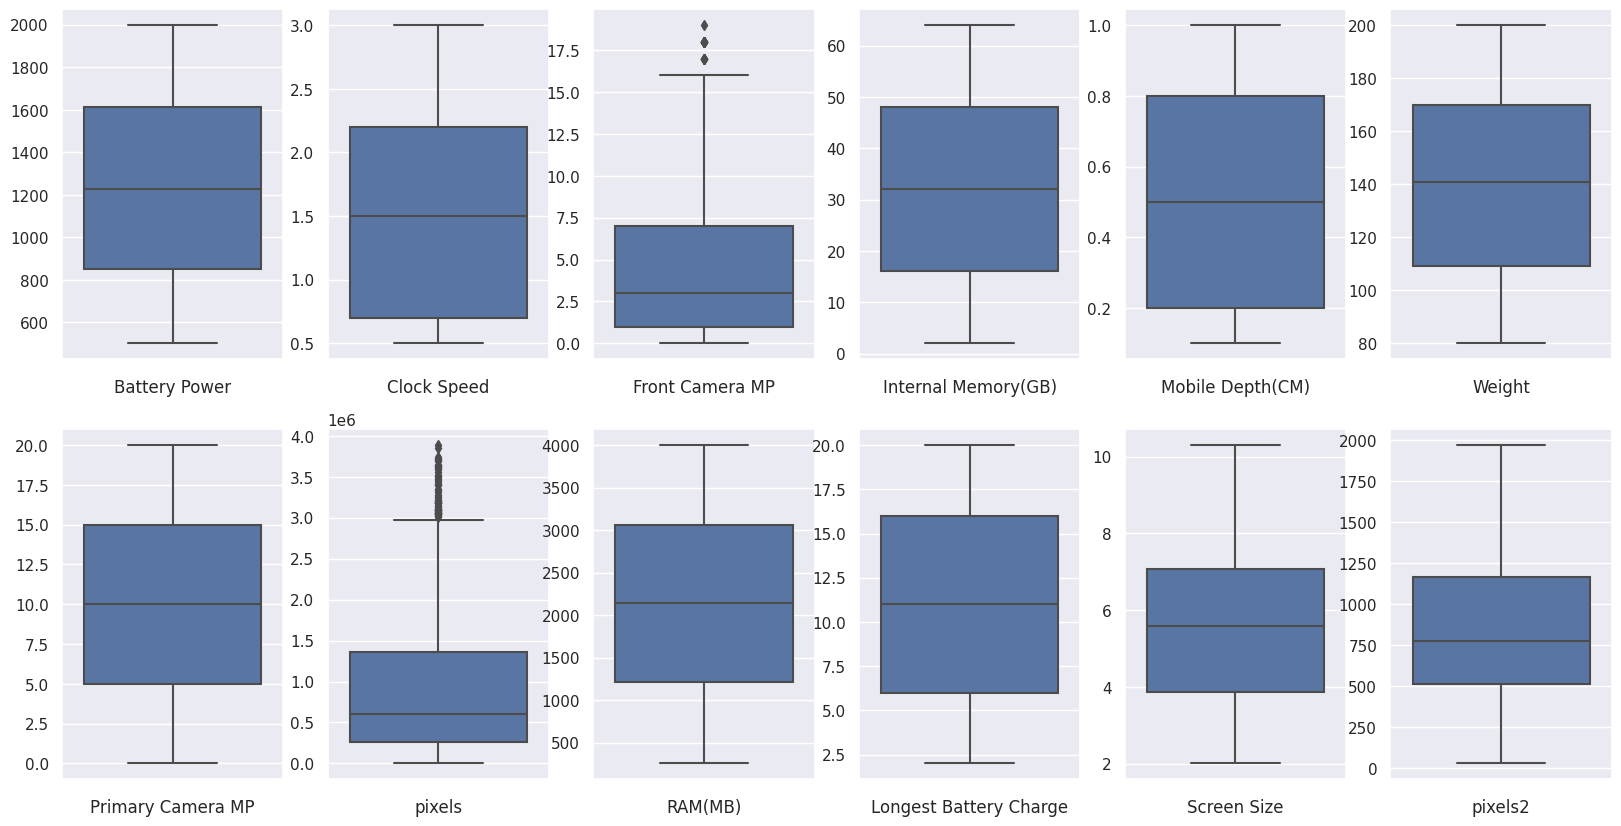

In [364]:
fig, axs = plt.subplots(2,6, figsize=(20,10))

for i in range(len(continuous)):
    sns.boxplot(y =df[continuous[i]], ax=axs[i//6][i%6])
    axs[i//6][i%6].set_xlabel(continuous[i])
    axs[i//6][i%6].set_ylabel('')

plt.show()

* **As we can see in the 'pixels' column that we have significant number of outliers, but in squared root column of 'pixel2' outliers are removed. So we are going to used only square root version of that**

In [365]:
df['pixels'] = df['pixels']**0.5
df.drop('pixels2',axis=1,inplace=True)

<Axes: ylabel='pixels'>

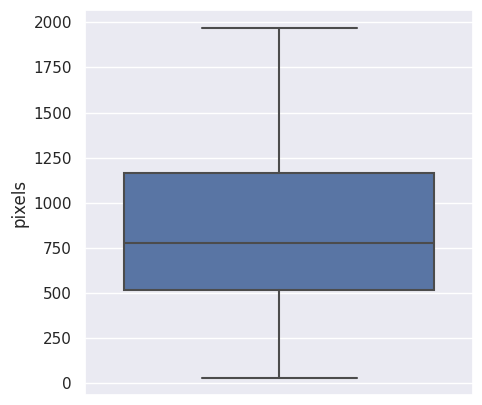

In [366]:
plt.figure(figsize=(5, 5))
sns.boxplot(y = df['pixels'] )

**See! No outliers now**

In [367]:
df.columns

Index(['Battery Power', 'Bluetooth', 'Clock Speed', 'Dual Sim',
       'Front Camera MP', '4G', 'Internal Memory(GB)', 'Mobile Depth(CM)',
       'Weight', 'Number of cores', 'Primary Camera MP', 'RAM(MB)',
       'Longest Battery Charge', '3G', 'Touch Screen', 'WIFI', 'Price Range',
       'Screen Size', 'pixels'],
      dtype='object')

**Data Preparation**

In [368]:
# Defining X and y

X = df.drop(['Price Range'], axis = 1)
y = df['Price Range']

# print the shape of X and Y
print("The shape of X is", X.shape)
print("The shape of Y is", y.shape)

The shape of X is (2000, 18)
The shape of Y is (2000,)


In [369]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [370]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state = 42)

In [371]:
X_train.shape

(1600, 18)

In [372]:
y_train.shape

(1600,)

## **Logistic Regression**

In [373]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [374]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [375]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.85      0.89      0.87        87
           2       0.84      0.86      0.85        90
           3       0.96      0.94      0.95       115

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



[[103   2   0   0]
 [  5  77   9   0]
 [  0   8  77   7]
 [  0   0   4 108]]


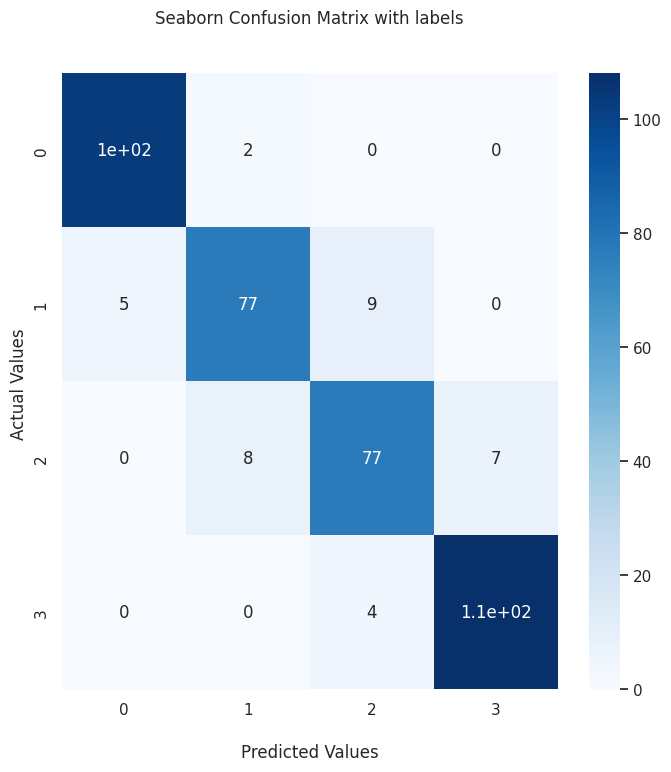

In [376]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [377]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       402
           1       0.88      0.90      0.89       403
           2       0.88      0.90      0.89       398
           3       0.97      0.94      0.96       397

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



## **Random Forest**

In [378]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [379]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [380]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.87

In [381]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.84      0.84        91
           2       0.77      0.82      0.79        92
           3       0.92      0.87      0.89       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



[[100   5   0   0]
 [  7  76   8   0]
 [  0   8  75   9]
 [  0   0  15  97]]


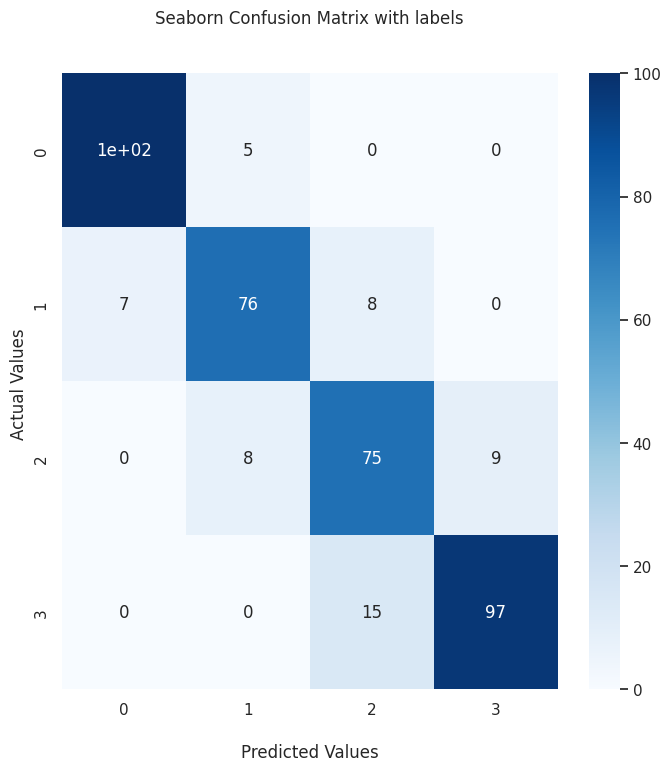

In [383]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [384]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,RAM(MB),0.497983
1,Battery Power,0.081541
2,pixels,0.074580
3,Weight,0.043586
4,Internal Memory(GB),0.043090


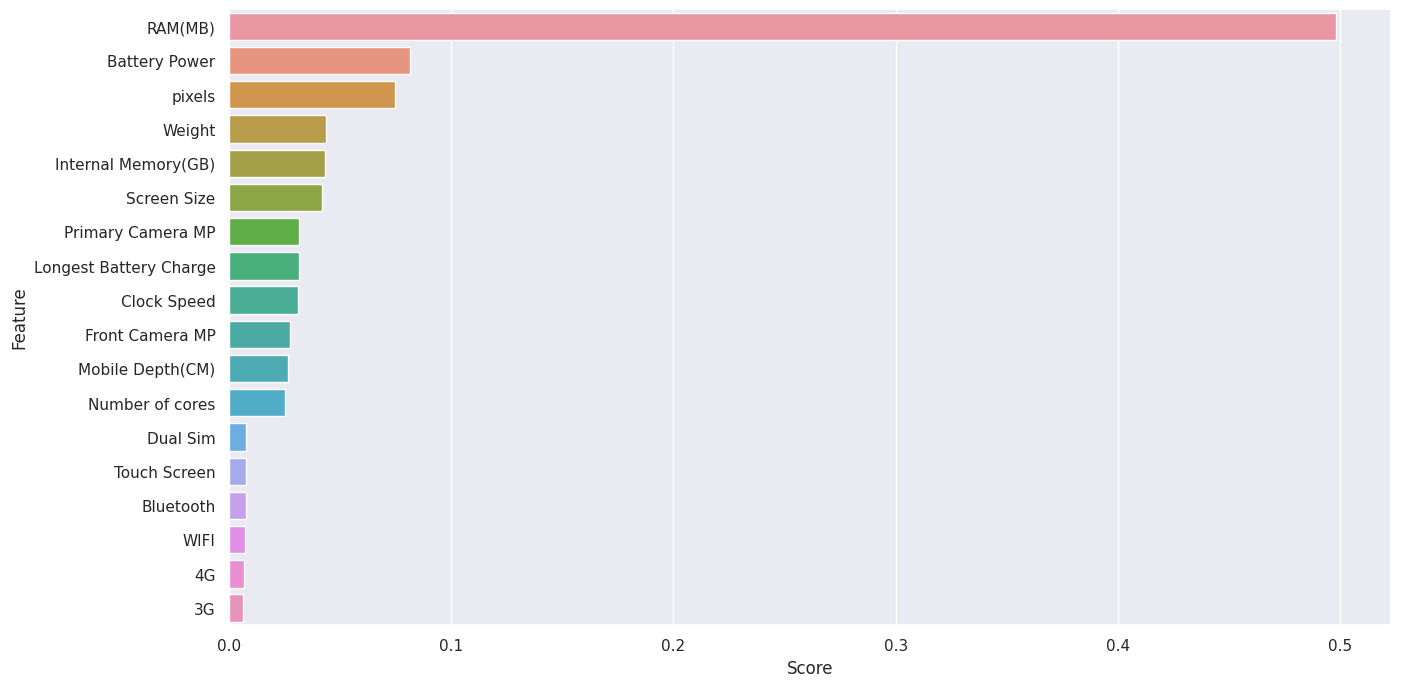

In [385]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

**Hyperparameter tuning for Random Forest**

In [321]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 30]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', max_leaf_nodes=30,
                       n_estimators=50)

In [391]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8625

In [392]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.81      0.80      0.81        91
           2       0.76      0.77      0.76        92
           3       0.93      0.89      0.91       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



[[101   4   0   0]
 [  7  73  11   0]
 [  0  13  71   8]
 [  0   0  12 100]]


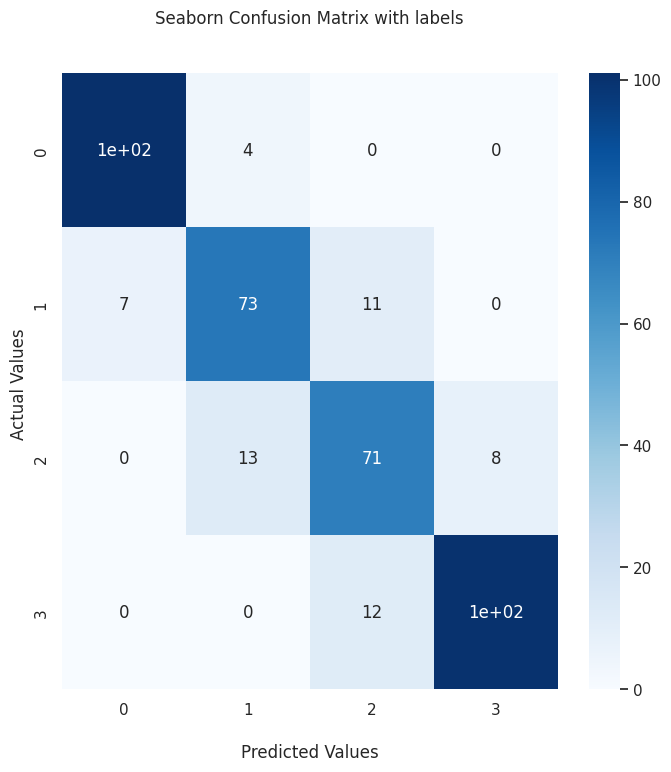

In [393]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [394]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.920625

In [395]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,RAM(MB),0.714930
1,Battery Power,0.077681
2,pixels,0.058655
3,Weight,0.023607
4,Internal Memory(GB),0.023012


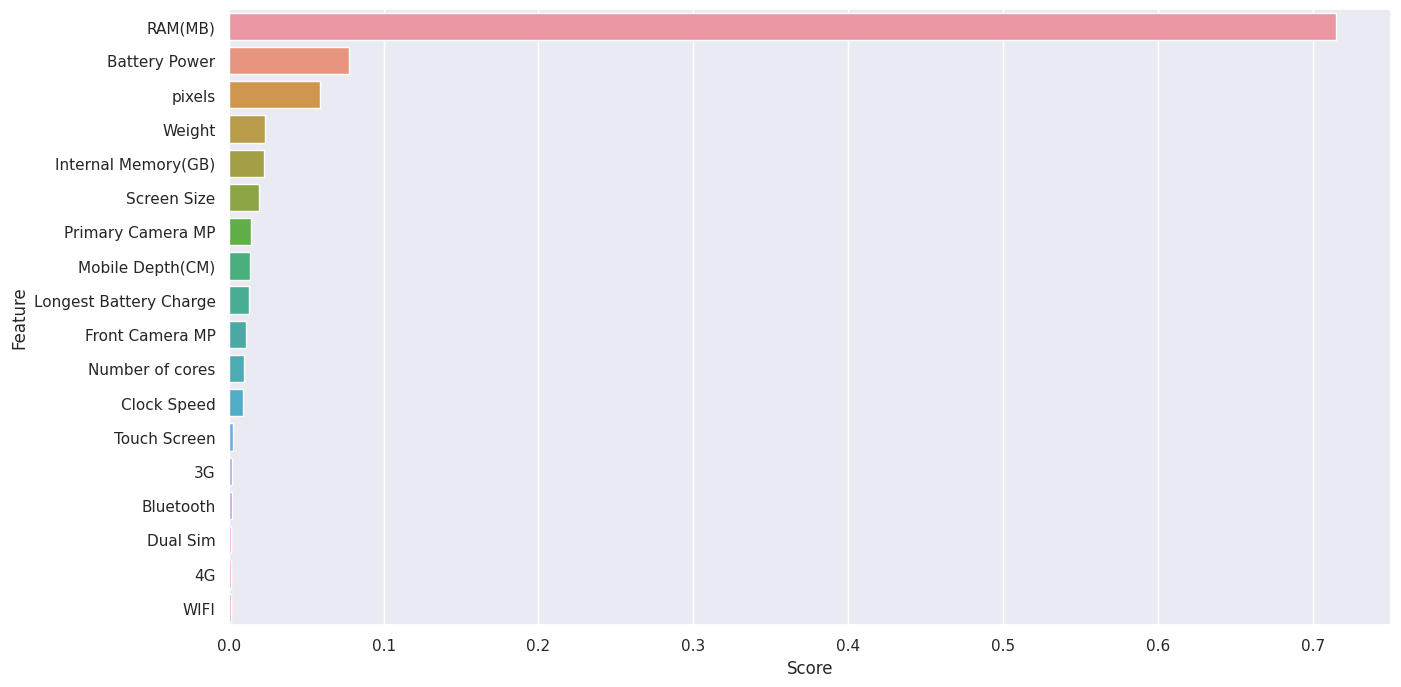

In [396]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## **Decision tree**

In [397]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [398]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [399]:
accuracy_score(y_test, y_pred_test)

0.82

In [400]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        93
           1       0.81      0.73      0.77       101
           2       0.78      0.67      0.72       108
           3       0.81      0.93      0.87        98

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.82      0.82      0.82       400



In [401]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.812 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.769 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.809 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [402]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       105
           1       0.75      0.85      0.79        91
           2       0.79      0.72      0.75        92
           3       0.90      0.93      0.92       112

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



[[ 94  11   0   0]
 [  4  77  10   0]
 [  0  15  66  11]
 [  0   0   8 104]]


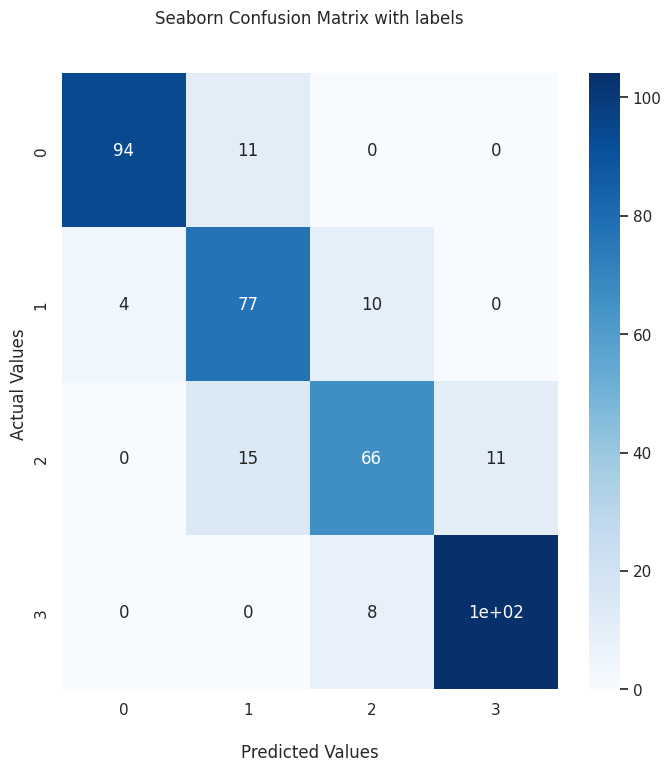

In [403]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [404]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       395
           1       0.81      0.88      0.84       409
           2       0.77      0.84      0.80       408
           3       0.96      0.84      0.90       388

    accuracy                           0.87      1600
   macro avg       0.88      0.87      0.87      1600
weighted avg       0.88      0.87      0.87      1600

